In [20]:
import numpy as np
from qiskit import QuantumCircuit, BasicAer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile

# Visualizing Circuits

* `qc.draw()`

As an example, we compute GHZ state. A Greenberger–Horne–Zeilinger state (GHZ state) is a certain type of entangled quantum state that involves at least three subsystems (particle states, or qubits). The GHZ state is an entangled quantum state for 3 qubits and its state is

$ \frac{1}{\sqrt{2}}\left[| 000 \rangle +  | 111 \rangle\right]$

In [2]:
ghz = QuantumCircuit(3,3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
#ghz.barrier(0,2) 
ghz.measure([0,1,2],[0,1,2])
#ghz.barrier(2)


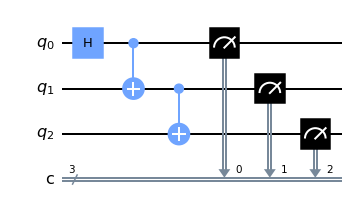

In [3]:
#filename='cu.png' to save a draw
ghz.draw('mpl',filename='cu.png')

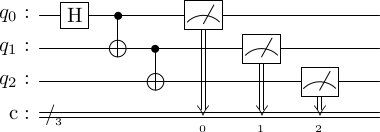

In [4]:
ghz.draw('latex')

In [5]:
#'text' by default
ghz.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

### Composing Circuits

* `qc.compose(circ)`

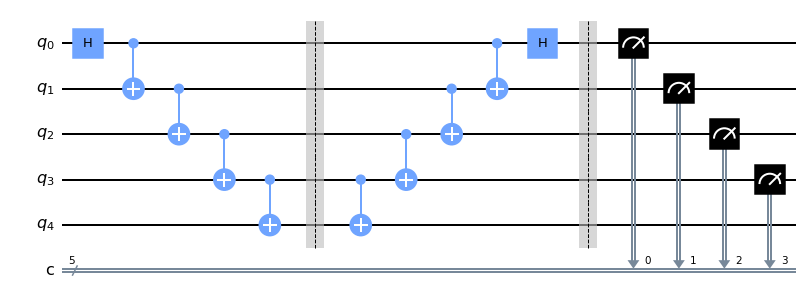

In [6]:
#numbr of qubtis and classical registers

n_qu = 5
n_clas = 5

#Tirst circuit
qc_comp1 = QuantumCircuit(n_qu,n_clas)

qc_comp1.h(0)
for i in range(n_qu-1):
    qc_comp1.cx(i,i+1)

qc_comp1.barrier()

#Second circuit
qc_comp2 = QuantumCircuit(n_qu,n_clas)
for i in reversed(range(n_qu-1)):
    qc_comp2.cx(i,i+1)

qc_comp2.h(0)

qc_comp2.barrier()


#Thid circuit
qc_comp3 = QuantumCircuit(n_qu,n_clas)
for i in range(n_qu-1):
    qc_comp3.measure([i],[i])


new_circ = qc_comp1.compose(qc_comp2).compose(qc_comp3)
new_circ.draw('mpl')


### Parametrized Circuits

* `qiskit.circuit.Parameter()`


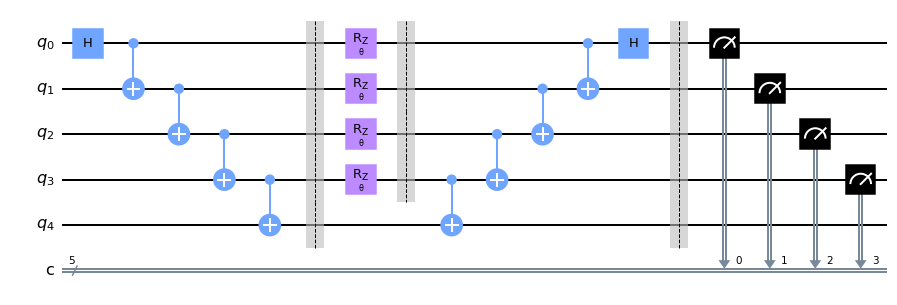

In [7]:
from qiskit.circuit import Parameter
    
#theta = 2*np.pi
theta = Parameter('θ')

qc_param = QuantumCircuit(n_qu-1) 

qc_param.rz(theta, range(5-1))
qc_param.barrier()

param_circ = qc_comp1.compose(qc_param).compose(qc_comp2).compose(qc_comp3)
param_circ.draw('mpl')

# Notice, with the function compose, we can compose circuits with diff number of qubits

we can also compose circuits as a sum. However, all circuits must possess the same number of qubtis. Besides, the 'QuantumCircuit.__add__()' method is being deprecated as you will see in the warning mensage.  

/tmp/ipykernel_19672/3879603678.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  new_circ2 = qc_comp1 + qc_comp2 + qc_comp3


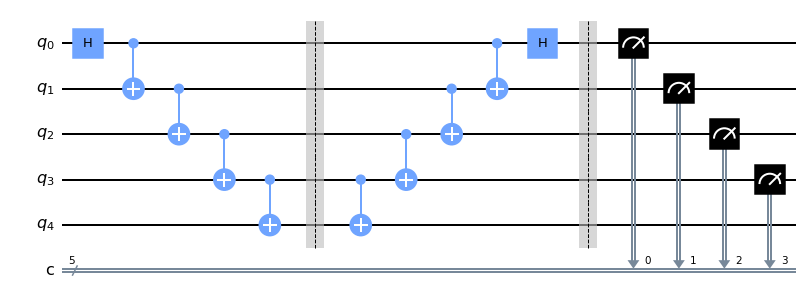

In [8]:
new_circ2 = qc_comp1 + qc_comp2 + qc_comp3
new_circ2.draw('mpl')

In addition, one can draw a circuit in reversed way, change it plot size, style, and also remove all barriers

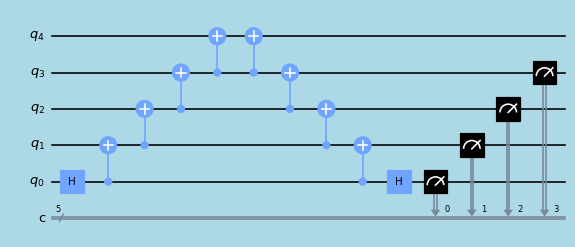

In [9]:
new_circ2.draw(output ='mpl',  plot_barriers=False, reverse_bits = True, 
               style={'backgroundcolor': 'lightblue'}, scale = 0.8)

### Depth of a circuit

* `qc.depth()`

In [10]:
param_circ.depth()

12

A circuit may have diferente dephts depending on the number of barriers applied. Comment param_circ.barrier() to see the difference.

In [11]:
param_circ.barrier()
param_circ.h(0)


param_circ.depth()

13

# transpiling a circuit it either for the backend or for a specific set of basis gates

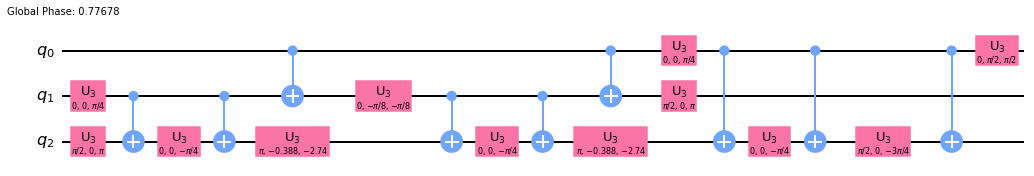

In [21]:
#going back to our simpler circuit!
qc_tr = QuantumCircuit(3)
qc_tr.mct([0,1],2)
qc_tr.cx(0,2)
qc_tr.h(1)
qc_tr.z(0)

trans = transpile(qc_tr, basis_gates = ['u3','cx','s'])
trans.draw('mpl')

# Customizing Gates

### Creating Gates

* `Gate`


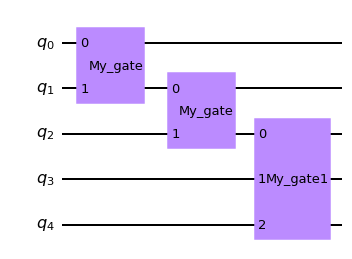

In [12]:
# with Gates
# defining a gate that applies on 2 and 3 qubits each time

from qiskit.circuit import Gate
from qiskit.circuit.library import HGate

my_gate = Gate(name = 'My_gate', num_qubits = 2, params =[])
my_gate1 = Gate(name = 'My_gate1', num_qubits = 3, params =[])


#Applying the gate
qc_gate = QuantumCircuit(n_qu, name ='KoeMenor')
qc_gate.append(my_gate, [0,1])
qc_gate.append(my_gate, [1,2])
qc_gate.append(my_gate1, [2,3,4])

qc_gate.draw('mpl')

### Wraping up circuits to gates with .to_gate() method

* `qc.to_gate()`


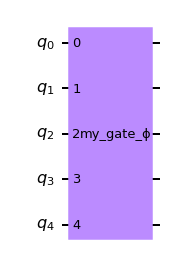

In [13]:
qc_wrap_up = qc_gate.to_gate()
qc_wrap_up.name = 'my_gate_ϕ' #we can even give it a name!

qc_comp = QuantumCircuit(5)
qc_comp.append(qc_wrap_up, [0,1,2,3,4])

qc_comp.draw('mpl')

### Decomposing gates

* `qc.decompose()`


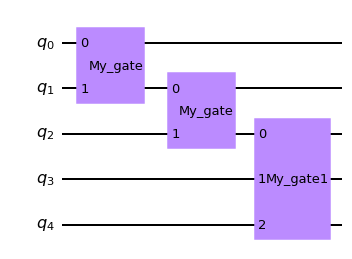

In [14]:
qc_decomp0 = qc_comp.decompose()
qc_decomp0.draw('mpl')

### Another example

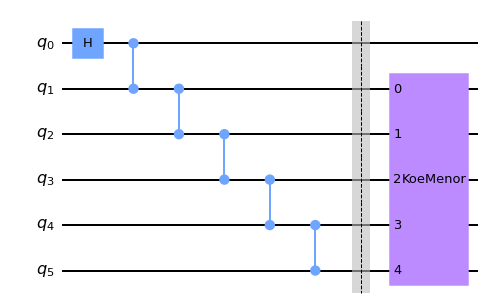

In [15]:
# convert to a gate and put it in arbitrary place in the other circuit
sub_inst = qc_gate.to_instruction()


# first circuit

qc_f = QuantumCircuit(n_qu+1)
qc_f.h(0)
for i in range(n_qu+1-1):
    qc_f.cz(i,i+1)

qc_f.barrier()

# adding the other

qc_f.append(sub_inst, [1,2,3,4,5])


qc_f.draw('mpl')

Notice, it decomposes all the gates

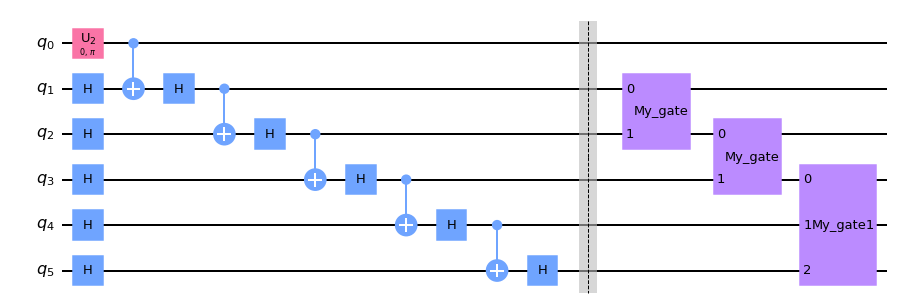

In [16]:
# decomposing gates

qc_decomp = qc_f.decompose()
qc_decomp.draw('mpl')

### Custom Controlled-Gates with HGates

* `HGates`

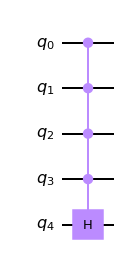

In [17]:
gener_cnot = HGate().control(4) #here we specify how many controls we want

qc_cnot = QuantumCircuit(5)
qc_cnot.append(gener_cnot, [0,1,2,3,4]) #the [a,b,c] correspond to controls and target respectively
qc_cnot.draw('mpl')

https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits_advanced/01_advanced_circuits.ipynb